**Data Science with Python: Decision Trees**

mostly adapted from Python_BusinessAnalytics_DecisionTrees.ipynb by Prof.Todri
https://colab.research.google.com/drive/10aOYercpcwMVVGbnGMsRI9P76KM300T4?usp=sharing

# Setup

In [ ]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Two of the main libraries used for scientific computing in Python are imported
# Numpy is the fundamental package for scientific computing with Python.
# SciPy (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing.
import numpy as np # np is an alias pointing to numpy
import scipy as sp # sp is an alias pointing to scipy

# Seed the generator to make this notebook's output stable across runs (the same result every time the code is run, ensuring reproducibility)
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
                                     # makes sure that any plots you create are displayed inline in the notebook, below the code cells, instead of in a separate window
import matplotlib                    # the matplotlib library is imported for plotting
import matplotlib.pyplot as plt      # pyplot module is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html

# Dynamically change the default rc (runtime configuration) settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
# We change the default rc (runtime configuration) settings (all the plots will have a consistent appearance without having to specify these settings every time)
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the x tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y tick labels

# Training and Visualizing a Decision Tree

In [ ]:
########################################### Imports ###########################################
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# A decision tree classifier is imported from sklearn.tree
from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for
                                                # classification
# Documentation for decision Tree Classifier
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seaborn is a Python data visualization library based on matplotlib.
# Seaborn documentation can be found here https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns     # sns is an alias pointing to seaborn
sns.set(color_codes=True) # Set aesthetic parameters in one step (configures the color palette). Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.)
                          # to the colors from this palette.
from scipy import stats   # Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats
                          # stats is seful for statistical functions


In [ ]:
######################################### Data Exploration #########################################
# load dataset
data = pd.read_csv('HW1_Data.csv')
data.head(15)

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.00,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.00,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.00,27,224,1,0,0,0,0,3,1
5,53.69,15.00,2.33,23,267,1,0,0,0,1,3,1
6,33.66,8.33,0.00,31,933,1,0,0,0,0,2,1
7,52.56,80.00,31.67,33,402,1,0,0,0,1,3,1
8,22.50,8.67,2.67,37,243,1,0,0,0,0,3,1
9,98.47,24.67,3.33,35,13,0,0,1,1,1,3,1


In [ ]:
data.info() #no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   31891 non-null  float64
 1   outcalls  31891 non-null  float64
 2   incalls   31891 non-null  float64
 3   months    31891 non-null  int64  
 4   eqpdays   31891 non-null  int64  
 5   webcap    31891 non-null  int64  
 6   marryyes  31891 non-null  int64  
 7   travel    31891 non-null  int64  
 8   pcown     31891 non-null  int64  
 9   creditcd  31891 non-null  int64  
 10  retcalls  31891 non-null  int64  
 11  churndep  31891 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.9 MB


In [ ]:
data.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#drop the abnormal <0 revenue and eqpdays
data = data[data['revenue']>=0]
data = data[data['eqpdays']>=0]

Reading Data Description:
![image.png](attachment:image.png)

Don't seem to have data leakage issue

In [ ]:
def tree_targetting_churndep(data,criterion, t_size):
    ######################################### Split Training/Test Data #########################################
    # Split data into features (X) and the target variable (y)
    X = data.drop("churndep", axis=1)  # "churndep" is the target variable
    y = data["churndep"]

    # Split data into training and test sets (e.g., 70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=42)

    ######################################### Model Training #########################################
    # Create the decision tree classifier with no max depth and entropy as the criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    tree_depth = clf.get_depth()
    print("Decision Tree Depth:", tree_depth)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate error
    error = 1 - accuracy

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Error:", error)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("confusion matrix:")
    print(cnf_matrix)

    result_df = pd.DataFrame()
    result_df['y_test'] = y_test
    result_df['y_pred'] = y_pred

    return(result_df)

In [ ]:
#decision tree model with no max depth, criterion = 'entropy',aplit_test_size = 0.3
result_df = tree_targetting_churndep(data,'entropy',0.3)

Decision Tree Depth: 56
Accuracy: 0.5307724513292862
Error: 0.4692275486707138
Precision: 0.5362782757148954
Recall: 0.521044992743106
F1 Score: 0.5285518982017037
confusion matrix:
[[2558 2173]
 [2310 2513]]


In [ ]:
result_df1 = tree_targetting_churndep(data,'gini',0.3)

Decision Tree Depth: 40
Accuracy: 0.5402972576931129
Error: 0.4597027423068871
Precision: 0.5453970929007794
Recall: 0.5368028198216878
F1 Score: 0.5410658307210031
confusion matrix:
[[2573 2158]
 [2234 2589]]


In [ ]:
result_df2 = tree_targetting_churndep(data,'log_loss',0.3)

Decision Tree Depth: 56
Accuracy: 0.5307724513292862
Error: 0.4692275486707138
Precision: 0.5362782757148954
Recall: 0.521044992743106
F1 Score: 0.5285518982017037
confusion matrix:
[[2558 2173]
 [2310 2513]]


In [ ]:
result_df3 = tree_targetting_churndep(data,'gini',0.25)

Decision Tree Depth: 44
Accuracy: 0.5385001884185404
Error: 0.4614998115814596
Precision: 0.5432129514321296
Recall: 0.5424023874658045
F1 Score: 0.5428073668491787
confusion matrix:
[[2106 1834]
 [1840 2181]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Create an array of different max_depth values to test
max_depth_values = range(1,20)

# Store the cross-validation scores for each max_depth value
cv_scores = []

X = data.drop("churndep", axis=1)  # "churndep" is the target variable
y = data["churndep"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

for max_depth in max_depth_values:
    # Create and fit a decision tree classifier with the current max_depth value
    clf = DecisionTreeClassifier( random_state=42, max_depth=max_depth)

    # Perform cross-validation with 5 folds (adjust as needed)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy score across the folds
    mean_accuracy = scores.mean()

    # Store the mean accuracy score for this max_depth value
    cv_scores.append(mean_accuracy)

# Find the max_depth that gives the highest cross-validation accuracy
best_max_depth = max_depth_values[cv_scores.index(max(cv_scores))]

# Print the best max_depth
print("Best max_depth:", best_max_depth)

Best max_depth: 4


In [ ]:
def tree_targetting_churndep_wMax(data,t_size,criterion,max_depth):
    ######################################### Split Training/Test Data #########################################
    # Split  data into features (X) and the target variable (y)
    X = data.drop("churndep", axis=1)  # "churndep" is the target variable
    y = data["churndep"]

    # Split  data into training and test sets (e.g., 70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=42)

    ######################################### Model Training #########################################
    # Create the decision tree classifier with no max depth and entropy as the criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42, max_depth=max_depth)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    tree_depth = clf.get_depth()
    print("Decision Tree Depth:", tree_depth)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate error
    error = 1 - accuracy

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Error:", error)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("confusion matrix:")
    print(cnf_matrix)

    result_df = pd.DataFrame()
    result_df['y_test'] = y_test
    result_df['y_pred'] = y_pred

    return(result_df)

In [ ]:
result_df6 = tree_targetting_churndep_wMax(data,0.3,'entropy',4)

Decision Tree Depth: 4
Accuracy: 0.5958760728490684
Error: 0.4041239271509316
Precision: 0.5765436028007639
Recall: 0.7511922040223927
F1 Score: 0.6523813811110111
confusion matrix:
[[2070 2661]
 [1200 3623]]


In [ ]:
result_df7 = tree_targetting_churndep_wMax(data,0.3,'log_loss',4)

Decision Tree Depth: 4
Accuracy: 0.5958760728490684
Error: 0.4041239271509316
Precision: 0.5765436028007639
Recall: 0.7511922040223927
F1 Score: 0.6523813811110111
confusion matrix:
[[2070 2661]
 [1200 3623]]


In [ ]:
result_df8 = tree_targetting_churndep_wMax(data,0.3,'gini',4)

Decision Tree Depth: 4
Accuracy: 0.5958760728490684
Error: 0.4041239271509316
Precision: 0.5765436028007639
Recall: 0.7511922040223927
F1 Score: 0.6523813811110111
confusion matrix:
[[2070 2661]
 [1200 3623]]


Decision Tree Visualization


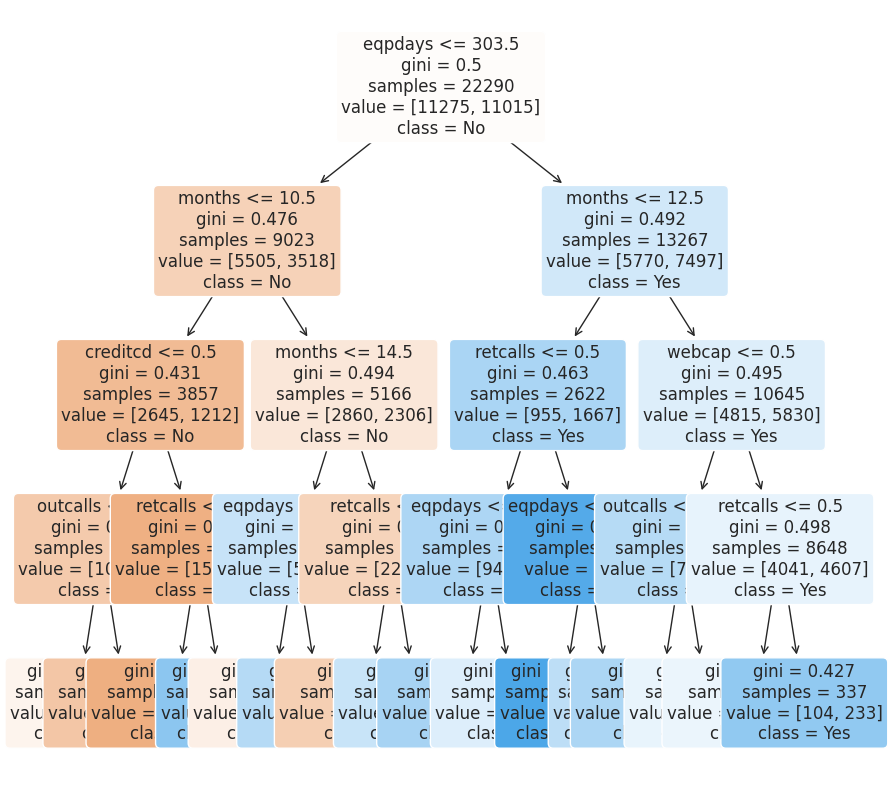

In [ ]:
######################################### Visualization of the Decision Tree #########################################
import matplotlib.pyplot as plt

# Imports the tree module from the scikit-learn library
from sklearn import tree
X = data.drop("churndep", axis=1)  # "churndep" is the target variable
y = data["churndep"]
 # Split  data into training and test sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

######################################### Model Training #########################################
# Create the decision tree classifier with no max depth and entropy as the criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)

plt.figure(figsize=(10,10)) # initializes a new figure where the tree will be plotted (size 10x10 inches)

# Visualizing the Tree
# plot_tree function from the tree module plots a decision tree; see documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
tree.plot_tree(clf.fit(X_train, y_train),                        # the decision tree to be plotted
                                                          # tree_clf.fit(X, y) returns the trained model
               feature_names = X_train.columns.tolist(),    # names of each of the features. If None, generic names will be used (“X[0]”, “X[1]”, …)
                                                          # extracts the names of the features starting from the third feature onward; this matches our previous use of X = iris.data[:, 2:]
               filled = True,                             # when set to True, color nodes to indicate majority class for classification,
                                                          # or purity of node for multi-output.
               class_names = ["No", "Yes"],           # names of each of the target classes in ascending numerical order.
               rounded = True,                            # when set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
               fontsize=12)                               # size of text font. If None, determined automatically to fit figure.

# Print the string 'Decision Tree Visualization' to the console
print('Decision Tree Visualization')


Confusion matrix, without normalization
[[2070 2661]
 [1200 3623]]
Normalized confusion matrix
[[0.44 0.56]
 [0.25 0.75]]


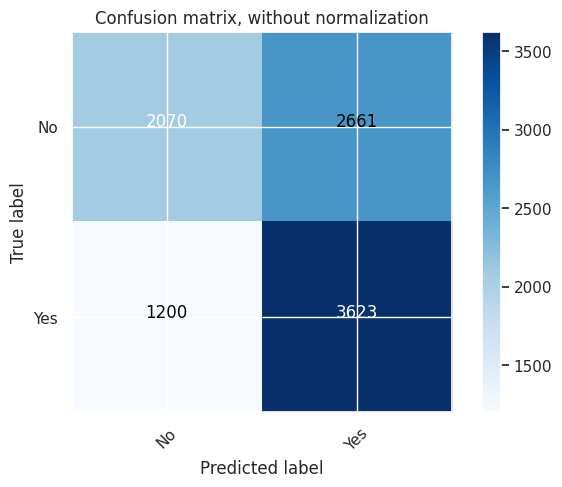

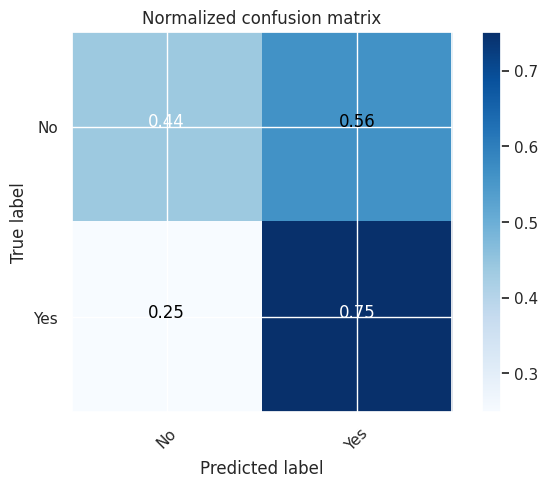

In [ ]:
###################################### Confusion Matrix #####################################

import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

# Define the plot_confusion_matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if i==j else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute the confusion matrix
cnf_matrix = confusion_matrix(result_df6['y_test'], result_df6['y_pred'])

# Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=["No", "Yes"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=["No", "Yes"],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()